In [15]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 2.8 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.4 MB 3.1 MB/s eta 0:00:05
   ----- ---------------------------------- 2.1/16.4 MB 3.4 MB/s eta 0:00:05
   ------- -------------------------------- 3.1/16.4 MB 3.9 MB/s eta 0:00:04
   ----------- ---------------------------- 4.7/16.4 MB 4.5 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/16.4 MB 5.3 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.4 MB 6.0 MB/s eta 0:00:02
   --------------------------- ------------ 11.3/16.4 MB 6.8 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.4 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 6.5 MB/s eta 0:00:00
N

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

config = {'user': 'root',
          'password': '123123123',
          'host': 'localhost', 
          'database': 'practice'}

connec = mysql.connector.connect(**config)
cursor = connec.cursor()
cursor


In [2]:
df = pd.read_sql("SELECT * FROM orders", connec)
df


C:\Users\Rohan\AppData\Local\Temp\ipykernel_13948\1850737417.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM orders", connec)


,Order_Id,Order_Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Product Id,cost_price,List _price,Quantity,Discount Percent,total_cost
0,568,2022-01-01,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Binders,OFF-BI-10001107,70,80,7,4,490
1,8061,2022-01-01,Standard Class,Corporate,United States,Long Beach,New York,11561,East,Office Supplies,Paper,OFF-PA-10001970,60,60,5,2,300
2,3442,2022-01-01,Second Class,Consumer,United States,New York City,New York,10024,East,Office Supplies,Paper,OFF-PA-10002137,100,110,14,2,1400
3,3791,2022-01-01,Standard Class,Home Office,United States,Los Angeles,California,90004,West,Office Supplies,Binders,OFF-BI-10001670,150,180,6,4,900
4,2472,2022-01-01,Standard Class,Consumer,United States,Fayetteville,North Carolina,28314,South,Furniture,Bookcases,FUR-BO-10002213,410,450,4,3,1640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,7684,2023-12-31,First Class,Home Office,United States,Midland,Michigan,48640,Central,Office Supplies,Binders,OFF-BI-10003527,3160,3810,3,3,9480
9990,5342,2023-12-31,Second Class,Consumer,United States,Oceanside,New York,11572,East,Technology,Accessories,TEC-AC-10002637,770,900,5,4,3850
9991,414,2023-12-31,Standard Class,Consumer,United States,San Francisco,California,94110,West,Furniture,Chairs,FUR-CH-10003956,100,110,2,5,200
9992,8915,2023-12-31,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Storage,OFF-ST-10001490,720,860,6,3,4320


In [63]:
df1 = pd.read_sql("SELECT Sub_Category, SUM(quantity) AS total_items FROM orders GROUP BY Sub_Category limit 5", connec)

df1

C:\Users\Rohan\AppData\Local\Temp\ipykernel_13396\2328357833.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(


,Sub_Category,total_items
0,Binders,5974.0
1,Paper,5178.0
2,Bookcases,868.0
3,Phones,3289.0
4,Chairs,2356.0


Text(0.5, 0, 'Sub_Categories')

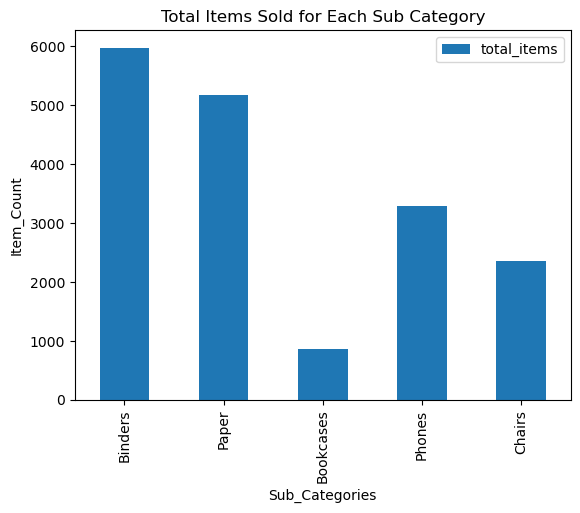

In [99]:
df1.plot(kind='bar', x='Sub_Category', y='total_items')
plt.title('Total Items Sold for Each Sub Category')
plt.ylabel('Item_Count')
plt.xlabel('Sub_Categories')

In [93]:
df2=pd.read_sql_query("select category,sum(total_cost) as Item_Count from orders group by category",connec)
df2

C:\Users\Rohan\AppData\Local\Temp\ipykernel_13396\2160285375.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=pd.read_sql_query("select category,sum(total_cost) as Item_Count from orders group by category",connec)


,category,Item_Count
0,Office Supplies,3106250.0
1,Furniture,3377960.0
2,Technology,3555190.0


Text(0.5, 0, 'Categories')

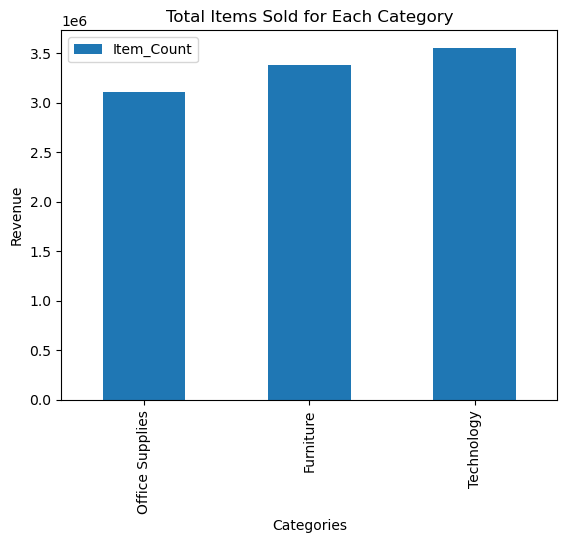

In [101]:
df2.plot(kind='bar', x='category', y='Item_Count')
plt.title('Total Items Sold for Each Category')
plt.ylabel('Revenue')
plt.xlabel('Categories')